<a href="https://colab.research.google.com/github/mari952/CSE445_ML/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Basic Dataset Information***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/miami-housing.csv')

row_col = df.shape

print(row_col)

(13932, 17)


***Data Types***

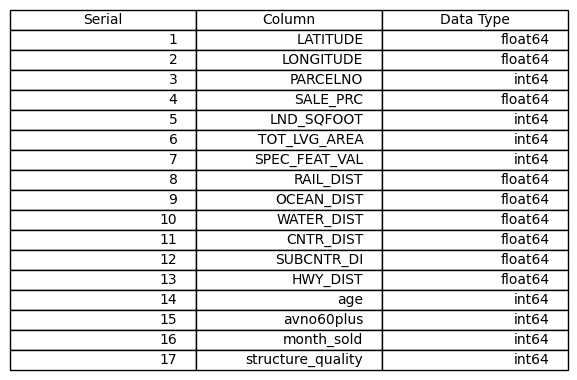

In [ ]:

# Extracting Data Types and showing it in a table
data_types = df.dtypes
data_types_table = pd.DataFrame({'Column': data_types.index, 'Data Type': data_types.values})
data_types_table.insert(0, 'Serial', range(1, len(data_types_table) + 1))

fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figsize according to your preference

# Creation of  the table
table = plt.table(cellText=data_types_table.values, colLabels=data_types_table.columns, loc='center')

# table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the scaling factor to modify the table size

# Remove axis
ax.axis('off')

plt.show()


***Missing values or Null counts***

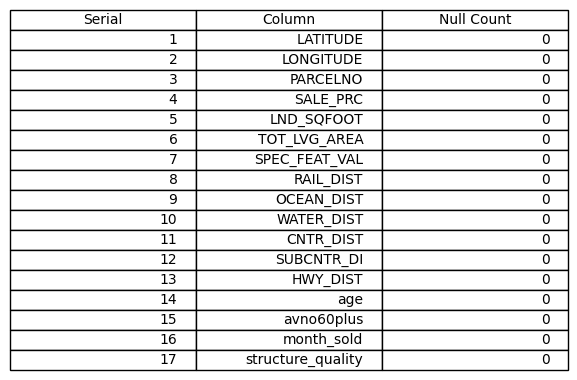

In [ ]:

# Extracting null counts for each column
null_counts = df.isnull().sum()
null_counts_table = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})
null_counts_table.insert(0, 'Serial', range(1, len(null_counts_table) + 1))

fig, ax = plt.subplots(figsize=(6, 4))

# Creation of the table
table = plt.table(cellText=null_counts_table.values, colLabels=null_counts_table.columns, loc='center')

# table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')
plt.show()


***Check for Duplicated Data***

In [ ]:
# Check if there is any duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13927    False
13928    False
13929    False
13930    False
13931    False
Length: 13932, dtype: bool

***Correlation Matrix - Normal output***

In [ ]:
#Get the correlation matrix

correlation_matrix = df.corr()

print(correlation_matrix)

                   LATITUDE  LONGITUDE  PARCELNO  SALE_PRC  LND_SQFOOT  \
LATITUDE           1.000000   0.721232 -0.165487  0.047701   -0.077481   
LONGITUDE          0.721232   1.000000 -0.432816  0.195274    0.018242   
PARCELNO          -0.165487  -0.432816  1.000000 -0.204068    0.071381   
SALE_PRC           0.047701   0.195274 -0.204068  1.000000    0.363077   
LND_SQFOOT        -0.077481   0.018242  0.071381  0.363077    1.000000   
TOT_LVG_AREA      -0.193972  -0.181007  0.102439  0.667301    0.437472   
SPEC_FEAT_VAL     -0.007634  -0.009372  0.055152  0.497500    0.390707   
RAIL_DIST         -0.172382  -0.303155  0.223387 -0.077009   -0.083901   
OCEAN_DIST         0.242735  -0.457477  0.289232 -0.274675   -0.161579   
WATER_DIST        -0.423396  -0.764256  0.295951 -0.127938   -0.055093   
CNTR_DIST         -0.717348  -0.791968  0.419933 -0.271425   -0.023181   
SUBCNTR_DI        -0.195823  -0.380220  0.243888 -0.370078   -0.159094   
HWY_DIST          -0.113443  -0.216406

***Correlation Matrix - HeatMap***

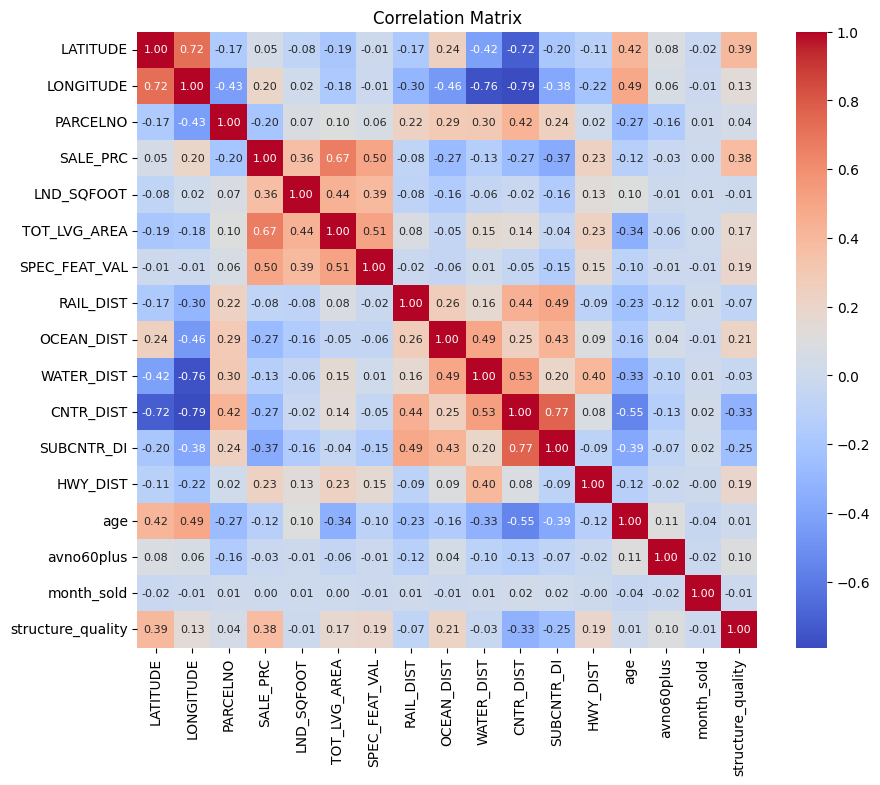

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"fontsize": 8})
plt.title('Correlation Matrix')
plt.show()

***Statistical analysis***

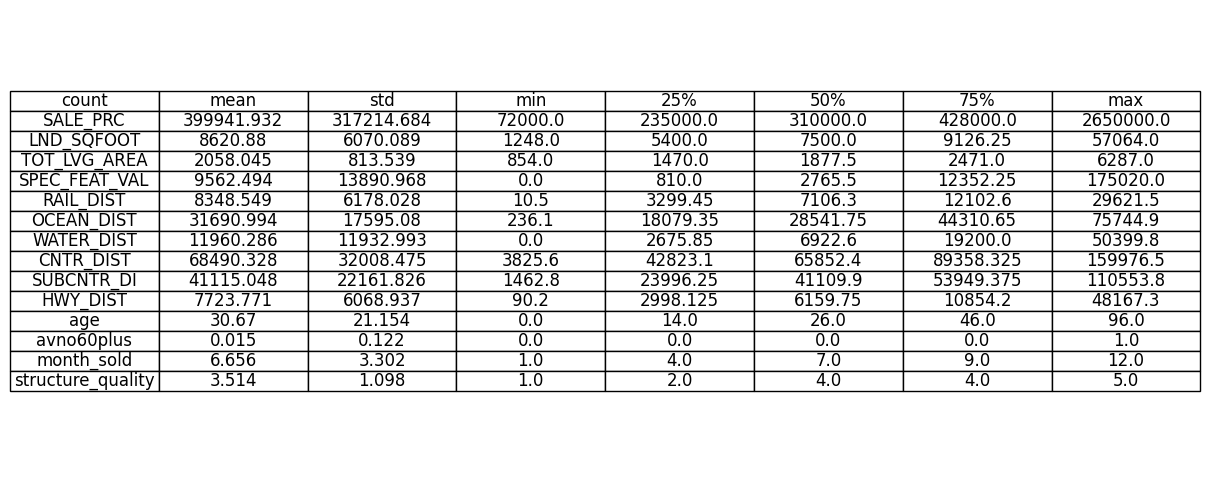

In [ ]:

# columns of interest
columns_of_interest = ['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA','SPEC_FEAT_VAL',
                       'RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST','SUBCNTR_DI',
                       'HWY_DIST','age','avno60plus','month_sold','structure_quality']

# calculate summary statistics for the selected columns
summary_stats = df[columns_of_interest].describe()

# Transpose the summary_stats DataFrame for better visualization
summary_stats = summary_stats.transpose()

# Round up the summary statistics to the nearest whole number
summary_stats = summary_stats.applymap(lambda x: math.ceil(x * 1000) / 1000)

# Creation of a table to show values
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Hide axis
summary_stats['count'] = summary_stats.index
table = ax.table(cellText=summary_stats.values,
                 colLabels=summary_stats.columns,
                 colWidths=[0.2] * len(summary_stats.columns),
                 cellLoc='center',
                 loc='center')

# table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.show()





***Sale price, land area, floor area, special feature price***

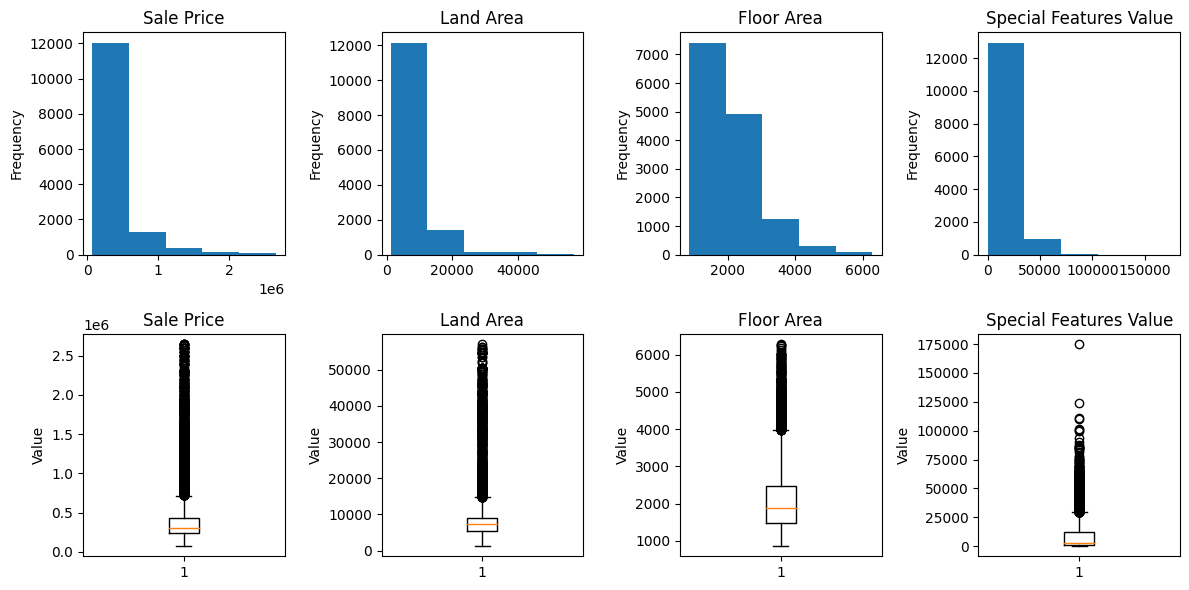

In [ ]:
# figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# histograms for each column
axes[0, 0].hist(df['SALE_PRC'], bins=5)
axes[0, 0].set_title('Sale Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['LND_SQFOOT'], bins=5)
axes[0, 1].set_title('Land Area')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['TOT_LVG_AREA'], bins=5)
axes[0, 2].set_title('Floor Area')
axes[0, 2].set_ylabel('Frequency')

axes[0, 3].hist(df['SPEC_FEAT_VAL'], bins=5)
axes[0, 3].set_title('Special Features Value')
axes[0, 3].set_ylabel('Frequency')

# box plots for each column
axes[1, 0].boxplot(df['SALE_PRC'])
axes[1, 0].set_title('Sale Price')
axes[1, 0].set_ylabel('Value')

axes[1, 1].boxplot(df['LND_SQFOOT'])
axes[1, 1].set_title('Land Area')
axes[1, 1].set_ylabel('Value')

axes[1, 2].boxplot(df['TOT_LVG_AREA'])
axes[1, 2].set_title('Floor Area')
axes[1, 2].set_ylabel('Value')

axes[1, 3].boxplot(df['SPEC_FEAT_VAL'])
axes[1, 3].set_title('Special Features Value')
axes[1, 3].set_ylabel('Value')

#spacing between subplots
plt.tight_layout()

plt.show()



***Distances from different important points***

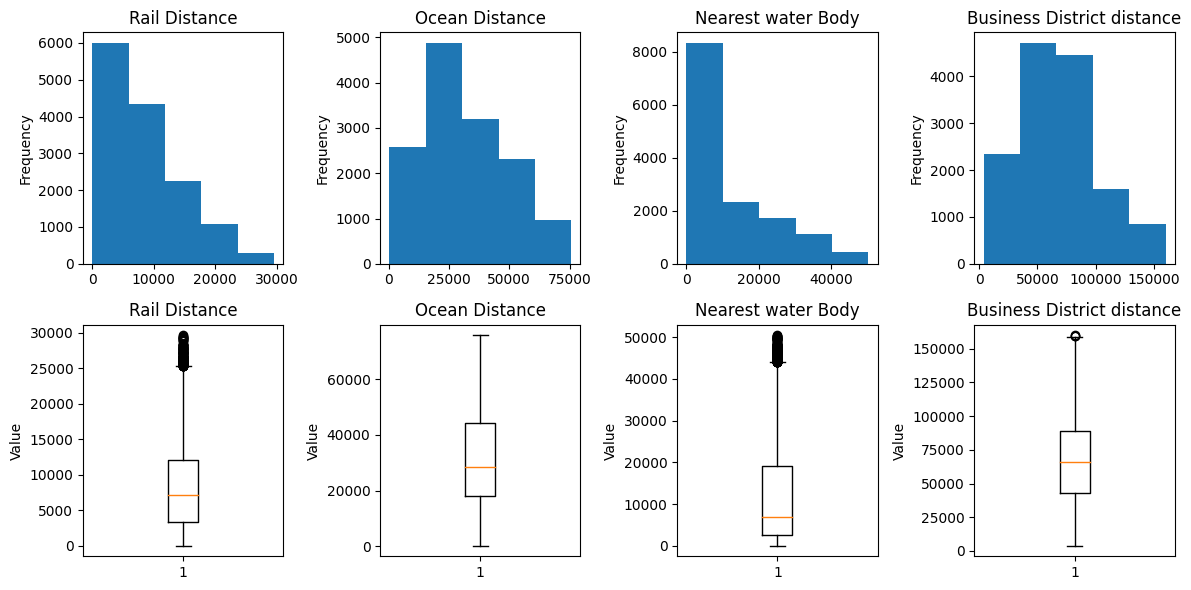

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# histograms for each column
axes[0, 0].hist(df['RAIL_DIST'], bins=5)
axes[0, 0].set_title('Rail Distance')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['OCEAN_DIST'], bins=5)
axes[0, 1].set_title('Ocean Distance')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['WATER_DIST'], bins=5)
axes[0, 2].set_title('Nearest water Body')
axes[0, 2].set_ylabel('Frequency')

axes[0, 3].hist(df['CNTR_DIST'], bins=5)
axes[0, 3].set_title('Business District distance')
axes[0, 3].set_ylabel('Frequency')

# box plots for each column
axes[1, 0].boxplot(df['RAIL_DIST'])
axes[1, 0].set_title('Rail Distance')
axes[1, 0].set_ylabel('Value')

axes[1, 1].boxplot(df['OCEAN_DIST'])
axes[1, 1].set_title('Ocean Distance')
axes[1, 1].set_ylabel('Value')

axes[1, 2].boxplot(df['WATER_DIST'])
axes[1, 2].set_title('Nearest water Body')
axes[1, 2].set_ylabel('Value')

axes[1, 3].boxplot(df['CNTR_DIST'])
axes[1, 3].set_title('Business District distance')
axes[1, 3].set_ylabel('Value')

# spacing between subplots
plt.tight_layout()

plt.show()

***Other attributes***

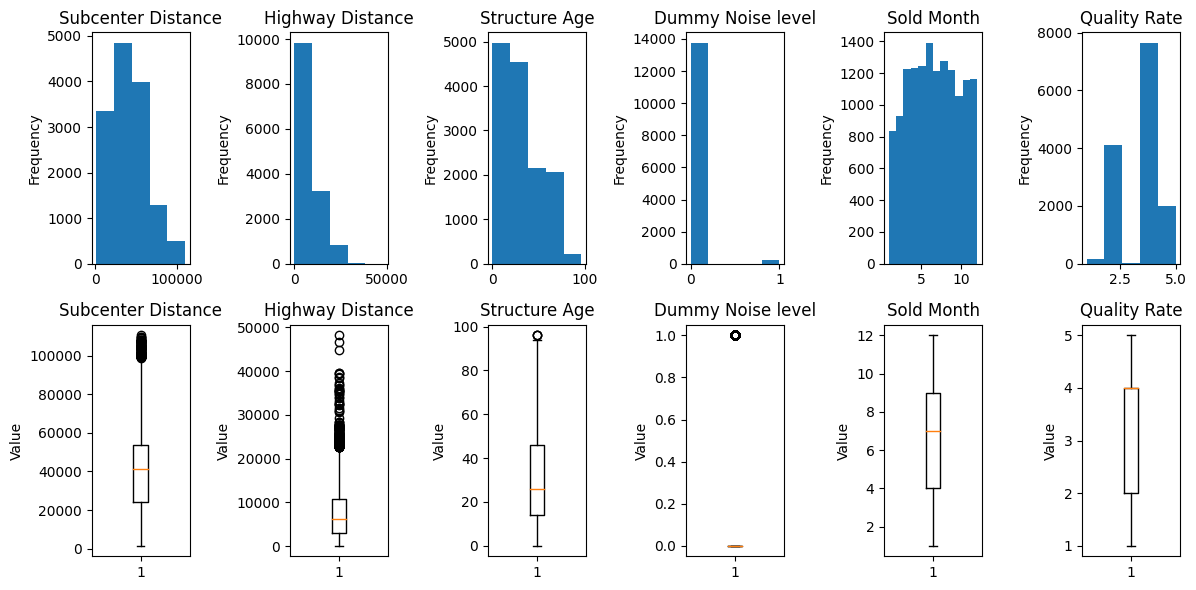

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 6, figsize=(12, 6))

# Plot histograms for each column
axes[0, 0].hist(df['SUBCNTR_DI'], bins=5)
axes[0, 0].set_title('Subcenter Distance')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['HWY_DIST'], bins=5)
axes[0, 1].set_title('Highway Distance')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['age'], bins=5)
axes[0, 2].set_title('Structure Age')
axes[0, 2].set_ylabel('Frequency')

axes[0, 3].hist(df['avno60plus'], bins=5)
axes[0, 3].set_title('Dummy Noise level')
axes[0, 3].set_ylabel('Frequency')

axes[0, 4].hist(df['month_sold'], bins=12)
axes[0, 4].set_title('Sold Month')
axes[0, 4].set_ylabel('Frequency')

axes[0, 5].hist(df['structure_quality'], bins=5)
axes[0, 5].set_title('Quality Rate')
axes[0, 5].set_ylabel('Frequency')

# Plot box plots for each column
axes[1, 0].boxplot(df['SUBCNTR_DI'])
axes[1, 0].set_title('Subcenter Distance')
axes[1, 0].set_ylabel('Value')

axes[1, 1].boxplot(df['HWY_DIST'])
axes[1, 1].set_title('Highway Distance')
axes[1, 1].set_ylabel('Value')

axes[1, 2].boxplot(df['age'])
axes[1, 2].set_title('Structure Age')
axes[1, 2].set_ylabel('Value')

axes[1, 3].boxplot(df['avno60plus'])
axes[1, 3].set_title('Dummy Noise level')
axes[1, 3].set_ylabel('Value')

axes[1, 4].boxplot(df['month_sold'])
axes[1, 4].set_title('Sold Month')
axes[1, 4].set_ylabel('Value')

axes[1, 5].boxplot(df['structure_quality'])
axes[1, 5].set_title('Quality Rate')
axes[1, 5].set_ylabel('Value')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

***Multivariate analysis***

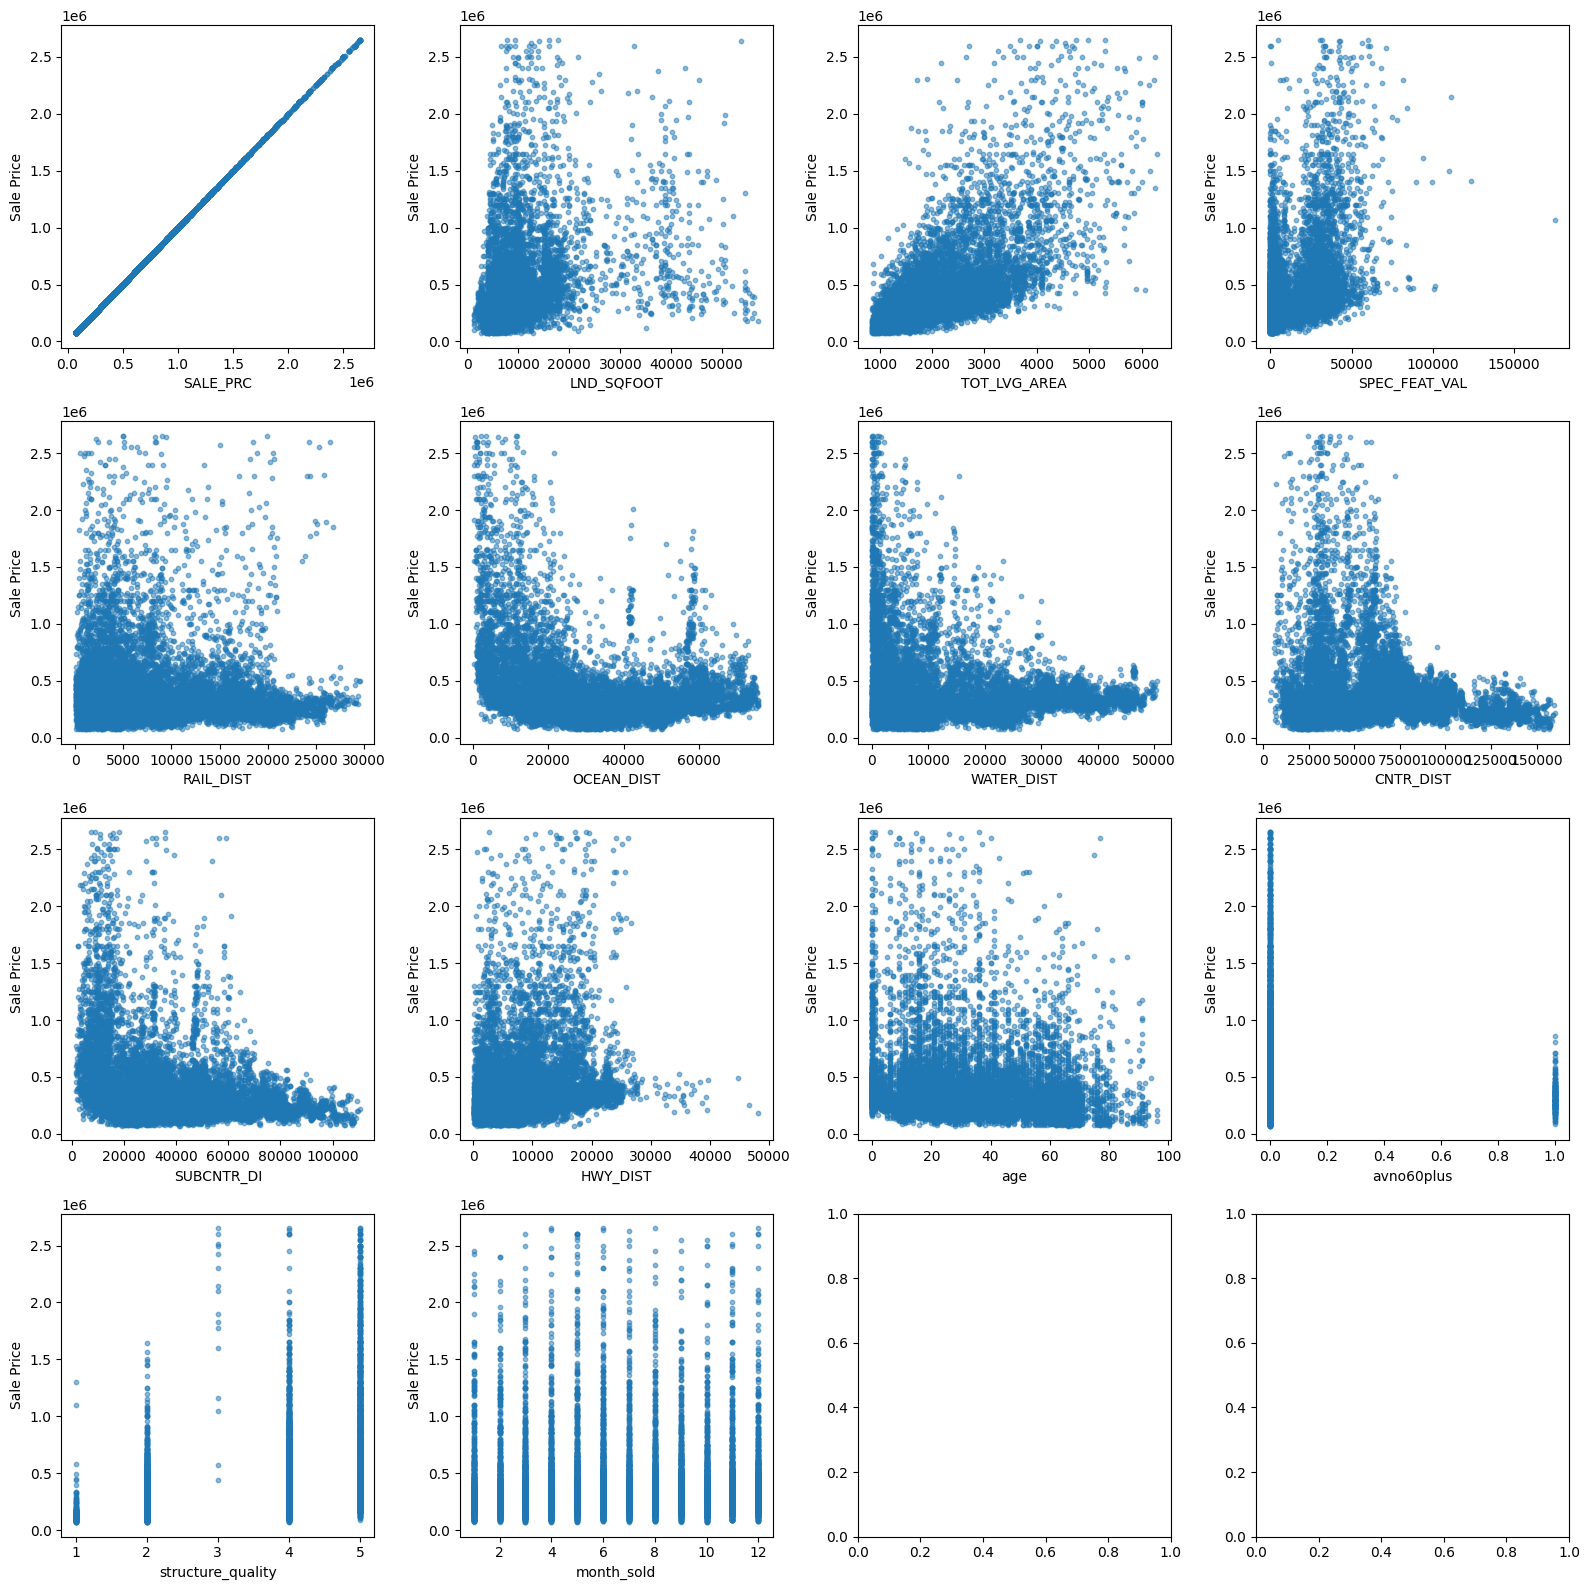

In [ ]:
# Variables to compare against
variables = ['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
             'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
             'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'structure_quality',
             'month_sold']

# the number of rows and columns for the subplot grid
num_variables = len(variables)
num_rows = math.ceil(num_variables / 4)
num_cols = min(num_variables, 4)

#figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# plot against the target variable
for i, col in enumerate(variables):
    # Get the data for the current variable and target variable
    data = df[[col, 'SALE_PRC']]

    # the subplot position
    row_idx = i // num_cols
    col_idx = i % num_cols

    # the scatter plot
    ax = axes[row_idx, col_idx]
    ax.scatter(data[col], data['SALE_PRC'], s=10, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')

# spacing between subplots
plt.tight_layout()
plt.show()


